In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('Data_Dictionary.csv')
df.head()

,S No.,Variable Name,Variable Description
0,1,Registration Number,This is a restaurant ID
1,2,Annual Turnover,Annual revenue of the restaurant in INR
2,3,Cuisine,Type of cuisine served in the restaurant
3,4,City,City at which the restaurant is located
4,5,Restaurant Location,This variable determines whether the restauran...


In [3]:
data=pd.read_csv('Train_dataset.csv')
data.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [39]:
test_data=pd.read_csv('Test_dataset.csv')
test_data.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [7]:
data.shape

(3493, 34)

In [8]:
data.columns

Index(['Registration Number', 'Annual Turnover', 'Cuisine', 'City',
       'Restaurant Location', 'Opening Day of Restaurant',
       'Facebook Popularity Quotient', 'Endorsed By',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')

In [11]:
data.isna().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [15]:
data.describe()

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
count,3493.000000,3.493000e+03,3394.000000,3437.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3444.000000,...,3281.000000,2728.000000,1010.000000,786.000000,205.000000,3468.000000,3493.000000,3493.000000,3493.00000,3493.000000
mean,61747.000000,3.072571e+07,77.938715,74.404684,0.788720,0.988262,0.808188,0.801889,0.800172,1.926539,...,8.479427,4.012830,2.932673,3.655216,3.590244,6.423010,6.874893,4.546808,3.23132,6.275122
std,1008.486572,2.165125e+07,9.829169,10.940327,0.408275,0.107719,0.393783,0.398633,0.399928,0.260930,...,1.287233,1.009044,0.859519,0.973250,0.906351,2.050026,1.847131,1.877063,1.99305,1.895057
min,60001.000000,3.500000e+06,43.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,60874.000000,1.800000e+07,72.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,7.000000,3.000000,2.000000,3.000000,3.000000,5.000000,6.000000,3.000000,2.00000,5.000000
50%,61747.000000,3.000000e+07,79.000000,74.050000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,7.000000,7.000000,5.000000,3.00000,6.000000
75%,62620.000000,3.700000e+07,85.745000,82.400000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,5.000000,3.000000,4.000000,4.000000,8.000000,8.000000,6.000000,5.00000,8.000000
max,63493.000000,4.000000e+08,97.760000,98.700000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,8.000000,6.000000,7.000000,6.000000,10.000000,10.000000,10.000000,10.00000,10.000000


In [16]:
data.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


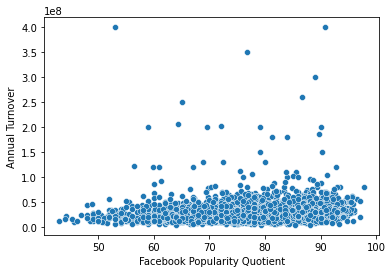

In [18]:
sns.scatterplot(data['Facebook Popularity Quotient'],data['Annual Turnover'])
plt.show()

In [21]:
X=data.drop('Annual Turnover',axis='columns')

In [4]:
df_num = data.select_dtypes(include=np.number).drop(["Annual Turnover"],axis=1)
df_num.head(2)

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,84.3,95.8,1,1,1,0,1,2.0,3,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,85.4,85.0,1,1,1,1,0,2.0,3,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8


In [5]:
df_cat = data.select_dtypes(include="object")
df_cat.head(2)

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Endorsed By,Restaurant Type,Restaurant Theme
0,"indian,irish",Bangalore,Near Business Hub,14-02-2009,Not Specific,Bar,Arabian
1,"indian,irish",Indore,Near Party Hub,29-09-2008,Tier A Celebrity,Bar,Greek


In [9]:
dummy_variables = pd.get_dummies(df_cat, drop_first=True)
dummy_variables.head(2)

,"Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai",...,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = pd.concat([df_num, dummy_variables],axis=1)

In [6]:
y=data['Annual Turnover']
y.head(2)

0    42000000
1    50000000
Name: Annual Turnover, dtype: int64

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X

array([[60001.  ,    84.3 ,    95.8 , ...,     0.  ,     0.  ,     0.  ],
       [60002.  ,    85.4 ,    85.  , ...,     0.  ,     0.  ,     0.  ],
       [60003.  ,    85.  ,    68.2 , ...,     0.  ,     0.  ,     0.  ],
       ...,
       [63491.  ,    80.83,    86.8 , ...,     0.  ,     0.  ,     0.  ],
       [63492.  ,    79.4 ,    86.  , ...,     0.  ,     0.  ,     0.  ],
       [63493.  ,    72.  ,    67.  , ...,     0.  ,     0.  ,     0.  ]])

In [14]:
pred_model=sm.OLS(y,X).fit()

In [60]:
print(pred_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual Turnover   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1.919
Date:                Sun, 09 May 2021   Prob (F-statistic):           9.72e-39
Time:                        19:05:50   Log-Likelihood:                -61597.
No. Observations:                3493   AIC:                         1.274e+05
Df Residuals:                    1403   BIC:                         1.402e+05
Df Model:                        2089                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -149.8207    458.063     -0.327      0.7

In [12]:
imputer = imputer.fit(X)
X = imputer.transform(X)

In [40]:
Testdata=test_data.select_dtypes(include=np.number)
Testdata

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,78.00,69.00,1,1,1,1,0,2,3,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,89.17,96.00,1,1,1,1,1,2,4,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,84.00,86.00,1,1,1,0,1,2,2,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,79.38,74.40,0,1,1,1,1,2,3,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,84.67,86.46,1,1,1,0,0,1,4,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20496,72.00,72.00,1,1,1,1,1,2,3,...,9.0,5.0,NaN,NaN,NaN,7,8,5,2,7
496,20497,78.28,53.55,1,1,1,1,0,2,1,...,8.0,3.0,NaN,NaN,NaN,9,8,8,4,8
497,20498,72.60,71.40,0,1,0,0,1,2,2,...,9.0,5.0,NaN,4.0,NaN,1,6,5,7,2
498,20499,93.40,95.90,1,1,0,1,0,2,3,...,9.0,6.0,6.0,NaN,NaN,7,7,2,3,5


In [41]:
testdata_cat=test_data.select_dtypes(include='object')
testdata_cat

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Endoresed By,Restaurant Type,Restaurant Theme
0,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,Tier A Celebrity,Bar,Greek
1,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,Not Specific,Bar,Nature
2,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,Not Specific,Bar,Greek
3,"tibetan,greek",-1,Near Party Hub,16-01-2005,Not Specific,Gastro Bar,90's
4,"cuban,british",Pune,Near Party Hub,10-11-2008,Not Specific,Bar,Mise En
...,...,...,...,...,...,...,...
495,"indian,irish",Noida,Near Party Hub,08-09-2009,Not Specific,Bar,90's
496,"tibetan,greek",Bangalore,Near Party Hub,20-06-2007,Not Specific,Bar,90's
497,"indian,irish",Bangalore,Near Party Hub,19-06-2010,Tier A Celebrity,Bar,90's
498,"tibetan,greek",Chennai,Near Party Hub,23-08-2012,Not Specific,Bar,Greek


In [42]:
testdata_cat=testdata_cat.replace(',','_',regex=True)
#testdata_cat['Cuisine']
testdata_cat

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Endoresed By,Restaurant Type,Restaurant Theme
0,tibetan_italian,Bangalore,Near Business Hub,13-07-2010,Tier A Celebrity,Bar,Greek
1,tibetan_italian,Hyderabad,Near Party Hub,05-09-2011,Not Specific,Bar,Nature
2,algerian_belgian,Hyderabad,Near Party Hub,12-04-2011,Not Specific,Bar,Greek
3,tibetan_greek,-1,Near Party Hub,16-01-2005,Not Specific,Gastro Bar,90's
4,cuban_british,Pune,Near Party Hub,10-11-2008,Not Specific,Bar,Mise En
...,...,...,...,...,...,...,...
495,indian_irish,Noida,Near Party Hub,08-09-2009,Not Specific,Bar,90's
496,tibetan_greek,Bangalore,Near Party Hub,20-06-2007,Not Specific,Bar,90's
497,indian_irish,Bangalore,Near Party Hub,19-06-2010,Tier A Celebrity,Bar,90's
498,tibetan_greek,Chennai,Near Party Hub,23-08-2012,Not Specific,Bar,Greek


In [43]:
imputer = imputer.fit(testdata_cat)
testdata_cat = imputer.transform(testdata_cat)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'tibetan_italian'

In [44]:
y_pred=pred_model.predict(testdata_cat)

ValueError: shapes (500,7) and (2157,) not aligned: 7 (dim 1) != 2157 (dim 0)